In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Commented HSLS_17 features.

features = {
    # === Academic readiness & rigor ===
    #"C2AVGSATMATH": "average_sat_math_score",
    #"C2AVGACTCOMP": "average_act_composite_score",
    #"C2NUMAPMATH": "number_of_ap_math_courses_offered",
    #"C2NUMAPSCI": "number_of_ap_science_courses_offered",
    #"C2PCTAP": "percent_seniors_taken_ap_course",
    #100% NA "A1IB": "school_offers_ib_program",
    #"A2MTHREQHS": "years_math_required_for_graduation",
    #"A2SCIREQHS": "years_science_required_for_graduation",

    # === STEM enrichment ===
    "A1MTHSCIFAIR": "holds_math_science_fairs",
    "A1MSMENTOR": "pairs_students_with_stem_mentors",
    "A1MSSUMMER": "partners_with_stem_summer_program",
    "A1MSFLDTRIP": "organizes_stem_field_trips",
    "A1MSSPEAKER": "brings_in_stem_guest_speakers",
    "A1MSAFTERSCH": "math_science_after_school_program",
    "A1MSPRGMS": "promotes_stem_contests_and_online_programs",

    # === School environment & leadership ===
    "A1HRTEACHERS": "hours_with_teachers_on_instructional_issues",
    "A1HRSTUDENT": "hours_meeting_with_students",
    "A1TCHRABSENT": "teacher_absenteeism_problem",
    "A1PRNTINV": "lack_parental_involvement_problem",
    "A1UNPREP": "students_unprepared_problem",
    "A1HEALTH": "poor_student_health_problem",
    "A1RESOURCES": "lack_teacher_resources_problem",
    #"A2TUTORSTRG": "tutoring_for_struggling_students",
    #"A2G11TEACHER": "pd_for_teachers_struggling_students",
    #"A2MSMENTORMS": "same_subject_mentor_for_stem_teachers",

    # === Parental engagement & planning ===
    "C1PLANPARENT": "student_plans_shared_with_parents",
    "C1SIGNOFF": "parent_signoff_on_student_plans",

    # === Socioeconomic & institutional context ===
    #100% NA "A1FREELUNCH": "percent_students_free_reduced_lunch",
    "A1SCHCONTROL": "school_control",
    #"X6PS1SLC": "first_postsecondary_institution_selectivity",
    #"X6PS1SEC": "first_postsecondary_institution_sector",
}

codes = [
    # === Academic readiness === #
    #"C2AVGSATMATH",
    #"C2AVGACTCOMP",
    #"C2NUMAPMATH",
    #"C2NUMAPSCI",
    #"C2PCTAP",
    #100% NA"A1IB",
    #"A2MTHREQHS",
    #"A2SCIREQHS",

    # === STEM === #
    "A1MTHSCIFAIR",
    "A1MSMENTOR",
    "A1MSSUMMER",
    "A1MSFLDTRIP",
    "A1MSSPEAKER",
    "A1MSAFTERSCH",
    "A1MSPRGMS",

    # === School environment & leadership === #
    "A1HRTEACHERS",
    "A1HRSTUDENT",
    "A1TCHRABSENT",
    "A1PRNTINV",
    "A1UNPREP",
    "A1HEALTH",
    "A1RESOURCES",
    #"A2TUTORSTRG",
    #"A2G11TEACHER",
    #"A2MSMENTORMS",

    # === Parental engagement & planning === #
    "C1PLANPARENT",
    "C1SIGNOFF",

    # === Socioeconomic & institutional context === #
    #100% NA "A1FREELUNCH",
    "A1SCHCONTROL",
    #"X6PS1SLC",
    #"X6PS1SEC",
]

In [4]:
df = pd.read_csv('./data/our_features_cleaned.csv', usecols=codes)
df.head()

,A1SCHCONTROL,A1MTHSCIFAIR,A1MSSUMMER,A1MSAFTERSCH,A1MSMENTOR,A1MSSPEAKER,A1MSFLDTRIP,A1MSPRGMS,A1HRTEACHERS,A1HRSTUDENT,A1TCHRABSENT,A1PRNTINV,A1UNPREP,A1HEALTH,A1RESOURCES,C1PLANPARENT,C1SIGNOFF
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,2.0,1.0,1.0,2.0,-7.0,-7.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,2.0,3.0,3.0,3.0,2.0,-9.0,-9.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,15.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,-9.0,4.0,4.0,2.0,2.0,1.0,1.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df = df.rename(columns=features)
df.head()

,school_control,holds_math_science_fairs,partners_with_stem_summer_program,math_science_after_school_program,pairs_students_with_stem_mentors,brings_in_stem_guest_speakers,organizes_stem_field_trips,promotes_stem_contests_and_online_programs,hours_with_teachers_on_instructional_issues,hours_meeting_with_students,teacher_absenteeism_problem,lack_parental_involvement_problem,students_unprepared_problem,poor_student_health_problem,lack_teacher_resources_problem,student_plans_shared_with_parents,parent_signoff_on_student_plans
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,2.0,1.0,1.0,2.0,-7.0,-7.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,2.0,3.0,3.0,3.0,2.0,-9.0,-9.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,15.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,-9.0,4.0,4.0,2.0,2.0,1.0,1.0
4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
for idx in range(len(df.columns)):
    df.replace({-9: np.nan, -8: np.nan, -5: np.nan,
                -7: np.nan, -4: np.nan, -6: np.nan}, inplace=True)

print(f'{df.isna().sum()/len(df)*100}')

school_control                                  5.433746
holds_math_science_fairs                       13.735303
partners_with_stem_summer_program              13.735303
math_science_after_school_program              13.735303
pairs_students_with_stem_mentors               13.735303
brings_in_stem_guest_speakers                  13.735303
organizes_stem_field_trips                     13.735303
promotes_stem_contests_and_online_programs     13.735303
hours_with_teachers_on_instructional_issues    18.501748
hours_meeting_with_students                    18.485860
teacher_absenteeism_problem                    17.071814
lack_parental_involvement_problem              16.785828
students_unprepared_problem                    17.159199
poor_student_health_problem                    16.761996
lack_teacher_resources_problem                 17.143311
student_plans_shared_with_parents              29.853829
parent_signoff_on_student_plans                37.964728
dtype: float64


In [7]:
for idx in range(len(df.columns)):
    print(f'{codes[idx]} -> {df.iloc[:, idx].value_counts()}')

A1MTHSCIFAIR -> school_control
1.0    8899
2.0    3005
Name: count, dtype: int64
A1MSMENTOR -> holds_math_science_fairs
0.0    6550
1.0    4309
Name: count, dtype: int64
A1MSSUMMER -> partners_with_stem_summer_program
0.0    5742
1.0    5117
Name: count, dtype: int64
A1MSFLDTRIP -> math_science_after_school_program
1.0    5646
0.0    5213
Name: count, dtype: int64
A1MSSPEAKER -> pairs_students_with_stem_mentors
0.0    7039
1.0    3820
Name: count, dtype: int64
A1MSAFTERSCH -> brings_in_stem_guest_speakers
1.0    6524
0.0    4335
Name: count, dtype: int64
A1MSPRGMS -> organizes_stem_field_trips
1.0    7160
0.0    3699
Name: count, dtype: int64
A1HRTEACHERS -> promotes_stem_contests_and_online_programs
1.0    8045
0.0    2814
Name: count, dtype: int64
A1HRSTUDENT -> hours_with_teachers_on_instructional_issues
10.0    2307
5.0     2218
3.0      809
2.0      797
8.0      738
15.0     699
20.0     552
6.0      404
4.0      359
1.0      300
12.0     268
7.0      208
25.0     153
30.0      90

In [8]:
# Mapping Categorical values to there definitions.

school_control = {
    1.0: 'Public',
    2.0: 'Private'
}

problem_map_3 = {
    1.0: 'Not a problem',
    2.0: 'Minor problem',
    3.0: 'Moderate to serious problem'
}

problem_map_4 = {
    1.0: 'Not a problem',
    2.0: 'Minor problem',
    3.0: 'Moderate problem',
    4.0: 'Serious problem'
}

df['school_control'] = df['school_control'].replace(school_control)
df['teacher_absenteeism_problem'] = df['teacher_absenteeism_problem'].replace(problem_map_3)
df['poor_student_health_problem'] = df['poor_student_health_problem'].replace(problem_map_3)
df['lack_parental_involvement_problem'] = df['lack_parental_involvement_problem'].replace(problem_map_4)
df['students_unprepared_problem'] = df['students_unprepared_problem'].replace(problem_map_4)
df['lack_teacher_resources_problem'] = df['lack_teacher_resources_problem'].replace(problem_map_4)

In [9]:
df.head()

,school_control,holds_math_science_fairs,partners_with_stem_summer_program,math_science_after_school_program,pairs_students_with_stem_mentors,brings_in_stem_guest_speakers,organizes_stem_field_trips,promotes_stem_contests_and_online_programs,hours_with_teachers_on_instructional_issues,hours_meeting_with_students,teacher_absenteeism_problem,lack_parental_involvement_problem,students_unprepared_problem,poor_student_health_problem,lack_teacher_resources_problem,student_plans_shared_with_parents,parent_signoff_on_student_plans
0,Public,1.0,0.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,Not a problem,Minor problem,Not a problem,Not a problem,Minor problem,NaN,NaN
1,Public,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,9.0,Minor problem,Moderate problem,Moderate problem,Moderate to serious problem,Minor problem,NaN,NaN
2,Public,0.0,0.0,0.0,1.0,0.0,1.0,1.0,15.0,5.0,Minor problem,Minor problem,Minor problem,Minor problem,Minor problem,1.0,0.0
3,Public,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN,Serious problem,Serious problem,Minor problem,Minor problem,1.0,1.0
4,Public,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.0,6.0,Not a problem,Not a problem,Not a problem,Not a problem,Not a problem,1.0,1.0


In [10]:
df[['hours_meeting_with_students', 'hours_with_teachers_on_instructional_issues']].describe()

,hours_meeting_with_students,hours_with_teachers_on_instructional_issues
count,10261.000000,10259.000000
mean,5.018419,8.452578
std,3.696892,6.171840
min,0.000000,0.000000
25%,2.000000,5.000000
50%,5.000000,7.000000
75%,5.000000,10.000000
max,60.000000,60.000000


In [11]:
# Start from 1 to exclude school_control.

true_false_columns = []

for idx in range(1, len(df.loc[:, df.columns != 'school_control'].columns)):
    if df.iloc[:, idx].nunique() == 2:
        true_false_columns.append(idx)

true_false_columns

[1, 2, 3, 4, 5, 6, 7, 15]

In [12]:
true_false_df = df.iloc[:, true_false_columns]
true_false_df = true_false_df.astype('bool')

for idx in range(len(true_false_df.columns)):
    true_false_df.replace({-9: np.nan, -8: np.nan, -5: np.nan, -7: np.nan}, inplace=True)
    true_false_df.iloc[:, idx] = true_false_df.iloc[:, idx].astype('bool')

true_false_df

,holds_math_science_fairs,partners_with_stem_summer_program,math_science_after_school_program,pairs_students_with_stem_mentors,brings_in_stem_guest_speakers,organizes_stem_field_trips,promotes_stem_contests_and_online_programs,student_plans_shared_with_parents
0,True,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,True
2,False,False,False,True,False,True,True,True
3,False,False,False,False,True,False,False,True
4,True,False,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...
12583,True,True,True,False,False,True,True,True
12584,True,True,True,False,True,True,True,True
12585,False,False,False,False,True,False,True,True
12586,True,True,True,True,True,True,True,True


Text(0.5, 1.0, 'Hours meeting with students.')

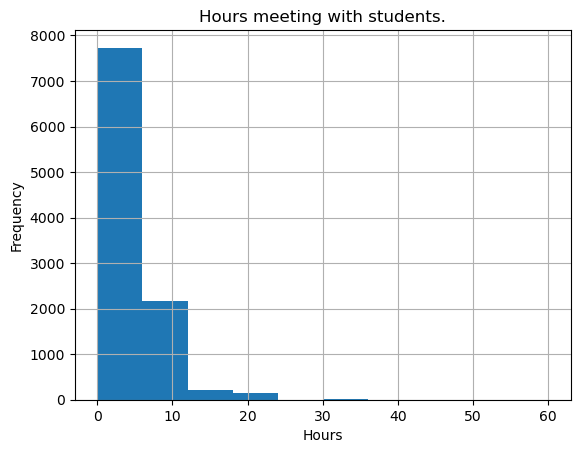

In [13]:
df['hours_meeting_with_students'].hist()
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours meeting with students.')

Text(0.5, 1.0, 'Hours with teachers on instructional issues.')

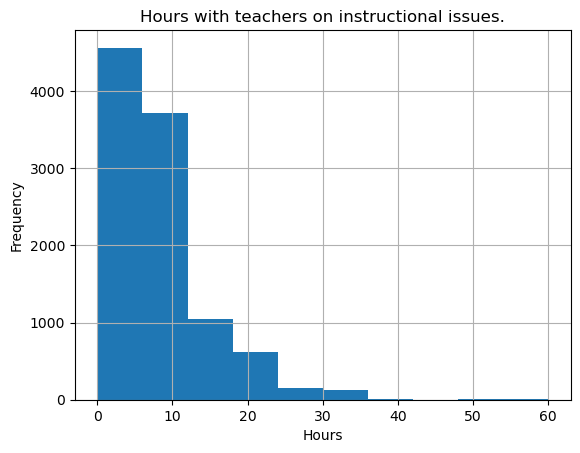

In [14]:
df['hours_with_teachers_on_instructional_issues'].hist()
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours with teachers on instructional issues.')

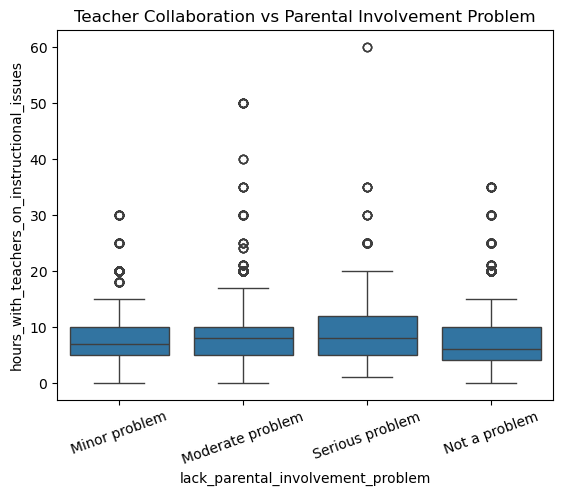

In [15]:
sns.boxplot(
    data=df,
    x='lack_parental_involvement_problem',
    y='hours_with_teachers_on_instructional_issues',
)

plt.xticks(rotation=20)
plt.title('Teacher Collaboration vs Parental Involvement Problem')
plt.show()

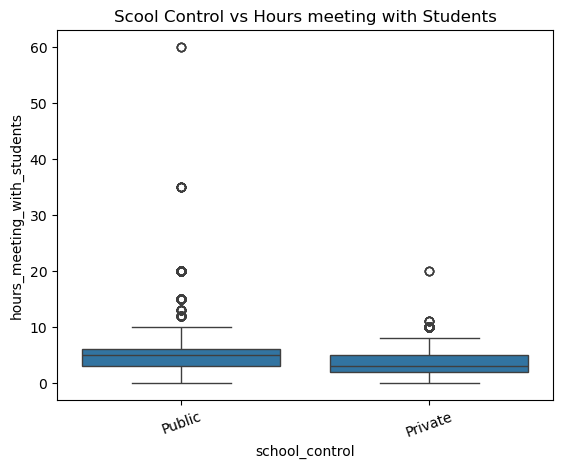

In [16]:
sns.boxplot(
    data=df,
    x='school_control',
    y='hours_meeting_with_students',
)

plt.xticks(rotation=20)
plt.title('Scool Control vs Hours meeting with Students')
plt.show()

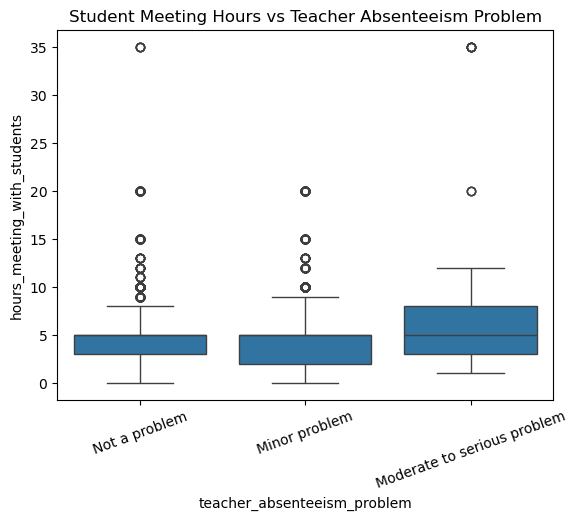

In [17]:
sns.boxplot(
    data=df,
    x='teacher_absenteeism_problem',
    y='hours_meeting_with_students',
)

plt.xticks(rotation=20)
plt.title('Student Meeting Hours vs Teacher Absenteeism Problem')
plt.show()

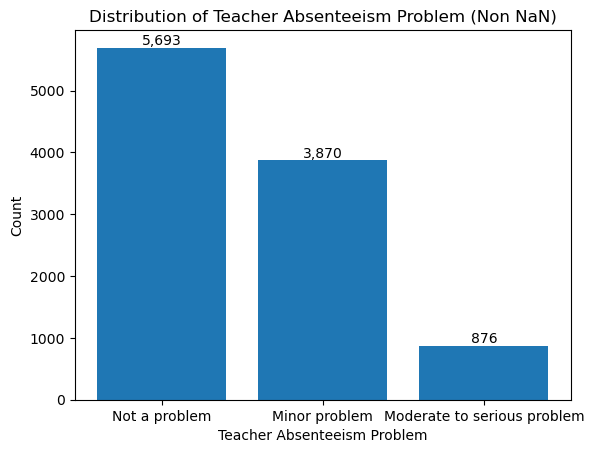

In [18]:
data = df['teacher_absenteeism_problem'].dropna()
bars = plt.bar(data.value_counts().index, data.value_counts().values)

plt.xlabel('Teacher Absenteeism Problem')
plt.ylabel('Count')
plt.title('Distribution of Teacher Absenteeism Problem (Non NaN)')
plt.bar_label(bars, fmt='{:,.0f}')
plt.show()

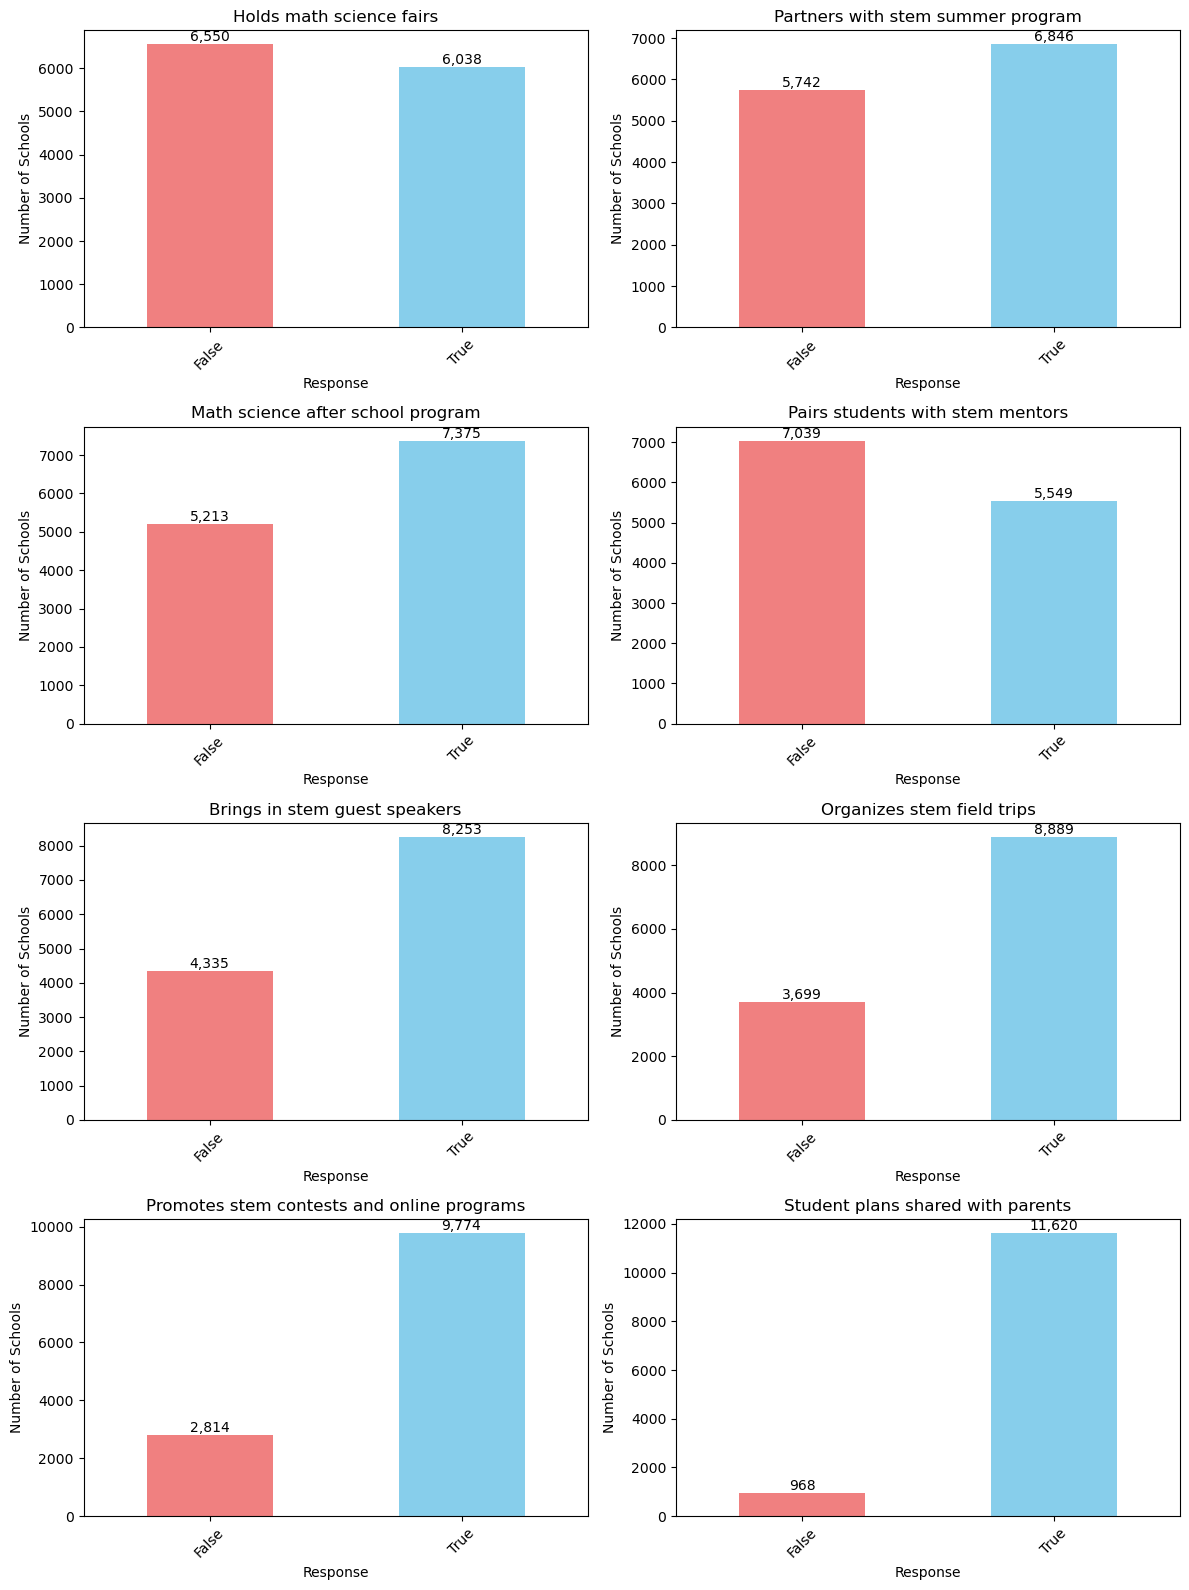

In [19]:
n_cols = 2
n_rows = math.ceil(len(true_false_df.columns) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, true_false_df.columns):
    counts = true_false_df[col].value_counts().reindex([False, True])
    bars = counts.plot(kind='bar', color=['lightcoral', 'skyblue'], ax=ax)

    ax.set_title(' '.join(col.capitalize().split('_')))
    ax.set_xlabel('Response')
    ax.set_ylabel('Number of Schools')
    ax.bar_label(ax.containers[0], fmt='{:,.0f}')
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()